In [1]:
%reload_ext autoreload
%autoreload 2

In [7]:
import os 
print(os.getcwd())

c:\Users\Batia\courses\DataScienceNotebooks\DataScienceNotebooks\Studentai\Vladimir


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt



In [13]:
from manofunkcijos import *

In [12]:
print(os.listdir())

['02.ipynb', '03.ipynb', '04.ipynb', '06.ipynb', '07.ipynb', '08.ipynb', '09.ipynb', '10.ipynb', '13.ipynb', '14.ipynb', '15.ipynb', '16.ipynb', '19.ipynb', '21.ipynb', 'example', 'failai', 'first.ipynb', 'manofunkcijos .py', 'new', 'Untitled-3.ipynb']


In [2]:
pip install mysql-connector-python==8.0.29

   ---------------------------------------- 0.0/342.0 kB ? eta -:--:--
   --- ------------------------------------ 30.7/342.0 kB ? eta -:--:--
   ----------------------- ---------------- 204.8/342.0 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 342.0/342.0 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: mysql-connector-python
    Found existing installation: mysql-connector-python 9.0.0
    Uninstalling mysql-connector-python-9.0.0:
      Successfully uninstalled mysql-connector-python-9.0.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [14]:
DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()

In [15]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""with toppenki as (
select device_brand, count(*) as kiek from sa
where device_brand is not null and device_brand != ''
group by device_brand
order by kiek desc
limit 5),
otherbrands as (
select 'other brands' as device_brand, count(*) as kiek from sa
where device_brand not in(select device_brand from toppenki)
or device_brand is null or device_brand =''),
allbrands as ( 
select device_brand, kiek from toppenki
union all
select device_brand, kiek from otherbrands)
select device_brand, kiek, round((kiek/(select sum(kiek) from allbrands)) * 100,2) as proc
from allbrands
order by proc desc;"""
C.execute(sql)
ans = C.fetchall()
gamintojai , kiekiai, dalis = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [16]:
pout(ans)

Rodoma 5 eilutės iš 6
|     Samsung      |      36290       |      30.49       |
|      Nokia       |      35186       |      29.57       |
|   other brands   |      31091       |      26.12       |
|    BlackBerry    |       7161       |       6.02       |
|        LG        |       5194       |       4.36       |
|   SonyEricsson   |       4090       |       3.44       |


In [17]:
print(gamintojai)

['Samsung', 'Nokia', 'other brands', 'BlackBerry', 'LG', 'SonyEricsson']


In [20]:
DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()

sql="""
select lytis, count(*),
avg(bdu_spalio)
from DUS2014N
group by lytis;
"""
C.execute(sql)
ans = C.fetchall()
lytis, kiekis, atlyginimas = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [21]:
pout(ans)

|        F         |      22366       |2097.3796584100805|
|        M         |      22586       |2633.693743912157 |


In [26]:
atlyginimas = list(map(lambda x: x/3.4528, atlyginimas))

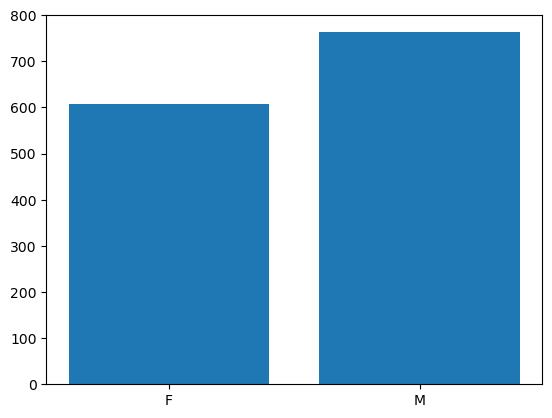

In [28]:
fig , axis = plt.subplots()
axis.bar(lytis, atlyginimas)
plt.show()

In [25]:
type(atlyginimas[0])
atlyginimas = list(map(lambda x: x/3.4528, atlyginimas))

float

In [30]:
sql="""select *, C/(select count(*) from sa)*100 as '%' from
(select * from
(select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T1
union all
select 'Others', count(*) as C
from sa
where device_brand not in
(select B from (select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T2)) as T3;"""
C.execute(sql)
ans = C.fetchall()
gamintojai, kiekiai, dalis = list(map(list, zip(*ans)))
pout(ans)

Rodoma 5 eilutės iš 6
|     Samsung      |      36290       |     30.4927      |
|      Nokia       |      35186       |     29.5651      |
|    BlackBerry    |       7161       |      6.0170      |
|        LG        |       5194       |      4.3643      |
|   SonyEricsson   |       4090       |      3.4366      |
|      Others      |      31091       |     26.1243      |


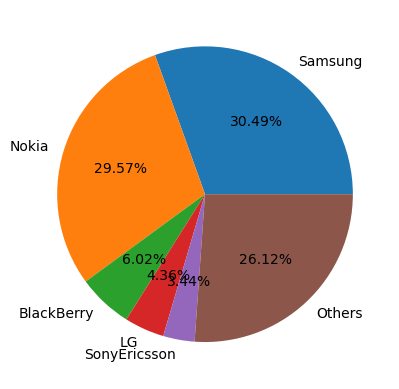

In [31]:
fig , axis = plt.subplots()
axis.pie(kiekiai, labels=gamintojai, autopct='%.2f%%')
plt.show()

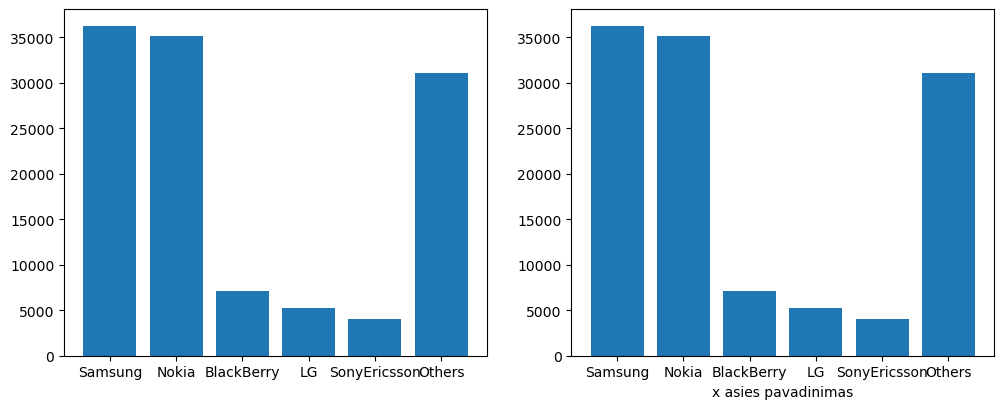

In [37]:
fig , axes =plt.subplots(1,2 , figsize=[12,4.5])
axes[0].bar(gamintojai, kiekiai)
axes[1].bar(gamintojai, kiekiai)
axes[1].set_xlabel('x asies pavadinimas')
plt.show()

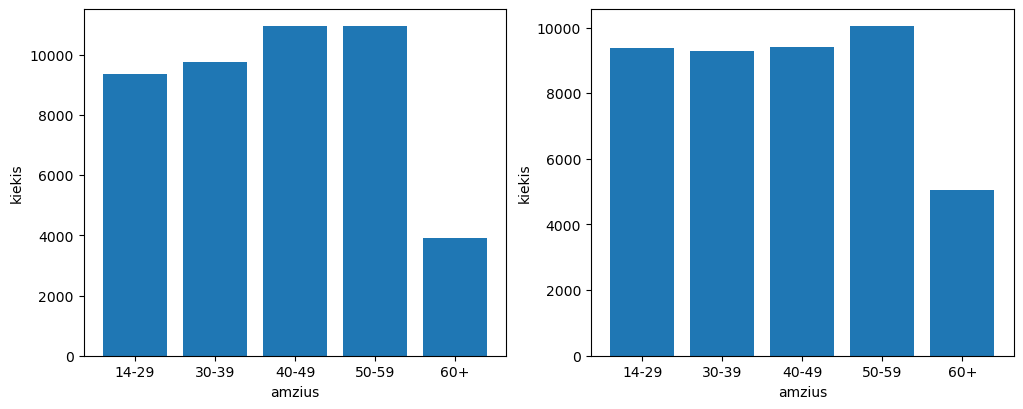

In [42]:
DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()

sql="""
select *
from
(select case
when amzius = '14-19' then '14-29'
when amzius = '20-29' then '14-29'
else amzius
end as Amz,
count(*) as C14
from DUS2014N
group by Amz) as T14
join
(select amzius as Amz, count(*) as C18
from DUS2018N
group by amzius) as T18
using (Amz);
"""
C.execute(sql)
ans = C.fetchall()
amzius, C14, C18 = list(map(list, zip(*ans)))
#? = np.transpose(ans)

fig , axes =plt.subplots(1,2 , figsize=[12,4.5])
axes[0].bar(amzius, C14)
axes[1].bar(amzius, C18)
axes[1].set_xlabel('amzius')
axes[0].set_xlabel('amzius')
axes[1].set_ylabel('kiekis')
axes[0].set_ylabel('kiekis')
plt.show()

In [45]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""with D14f as
(select case
when amzius in ('14-19', '20-29') then '14-29'
else amzius
end as A, count(*)
from DUS2014N
where lytis = 'F'
group by A),
D14m as
(select case
when amzius in ('14-19', '20-29') then '14-29'
else amzius
end as A, count(*)
from DUS2014N
where lytis = 'M'
group by A)
select * from D14f join D14m using (A);"""
C.execute(sql)
ans = C.fetchall()
gr, D14f, D14m = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

|      14-29       |       4080       |       5282       |
|      30-39       |       4551       |       5196       |
|      40-49       |       5879       |       5068       |
|      50-59       |       5956       |       5012       |
|       60+        |       1900       |       2028       |


In [46]:
sql="""with D18f as
(select amzius, count(*)
from DUS2018N
where lytis = 'F'
group by amzius),
D18m as
(select amzius, count(*)
from DUS2018N
where lytis = 'M'
group by amzius)
select * from D18f join D18m using (amzius);"""
C.execute(sql)
ans = C.fetchall()
amzius, = list(map(list, zip(*ans)))

fig , axes =plt.subplots(1,2 , figsize=[12,4.5])
axes[0].bar(amzius, C14)
axes[1].bar(amzius, C18)
axes[1].set_xlabel('amzius')
axes[0].set_xlabel('amzius')
axes[1].set_ylabel('kiekis')
axes[0].set_ylabel('kiekis')
plt.show()

ValueError: not enough values to unpack (expected 7, got 3)

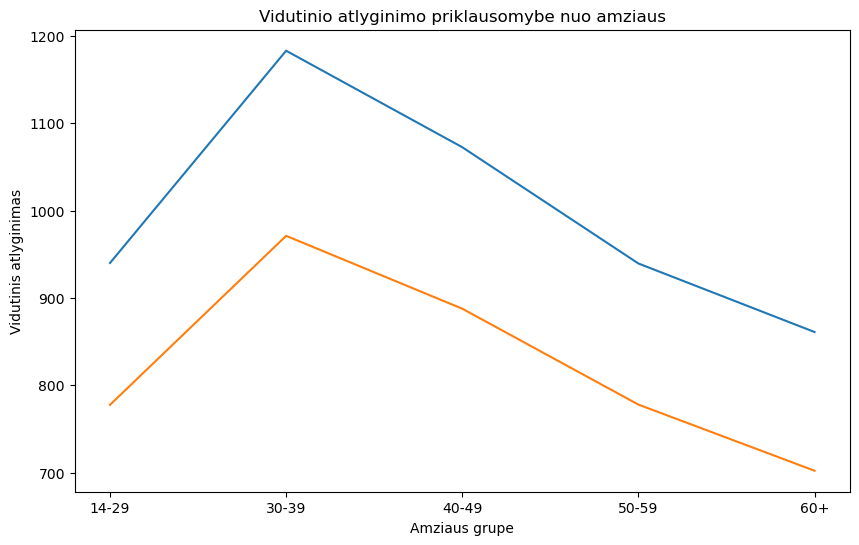

In [47]:
# 2018 metams, parodykite vaizdžiai vidutinio atlyginimo priklausomybę nuo amžiaus grupės, atskirai vyrams, atskirai moterims

sql="""select lytis, avg(bdu_spalio), amzius
from DUS2018N
group by lytis, amzius;"""
C.execute(sql)
ans = C.fetchall()
lytis,vidurkis,amzius = list(map(list, zip(*ans)))

m = [vidurkis[i] for i in range(len(lytis)) if lytis[i] == 'M']
f = [vidurkis[i] for i in range(len(lytis)) if lytis[i] == 'F']
amzm = [amzius[i] for i in range(len(lytis)) if lytis[i] == 'M']
amzf = [amzius[i] for i in range(len(lytis)) if lytis[i] == 'F']


fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(amzm, m, label='Vyrai')
ax.plot(amzf, f, label='Moterys')

ax.set_xlabel('Amziaus grupe')
ax.set_ylabel('Vidutinis atlyginimas')
ax.set_title('Vidutinio atlyginimo priklausomybe nuo amziaus')
plt.show()

In [ ]:
# -- • Raskite 5-kis populiariausius autopliuslt skelbimuose  
# -- esančius gamintojus, suraskite, kokia buvo kiekvienam  
# -- iš šių gamintojų automobilių vidutinė kaina, rida,  
# -- automobilių amžius. (viena kompleksinė SQL užklausa)
# -- vizualizuokite šią informaciją stulpeline ar kitokia diagrama

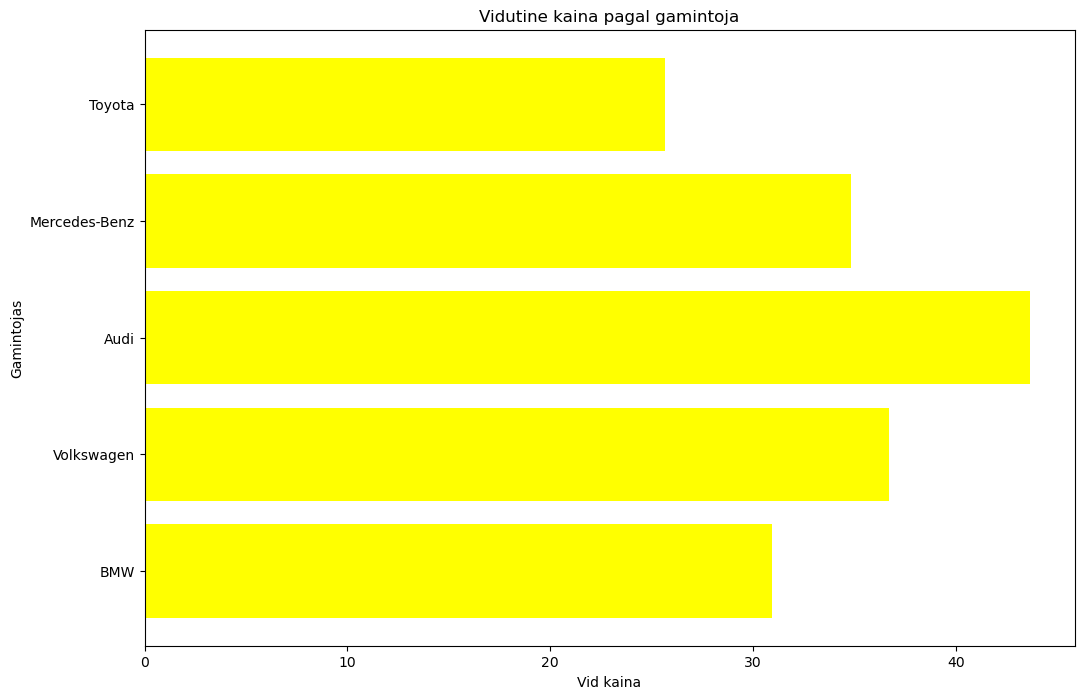

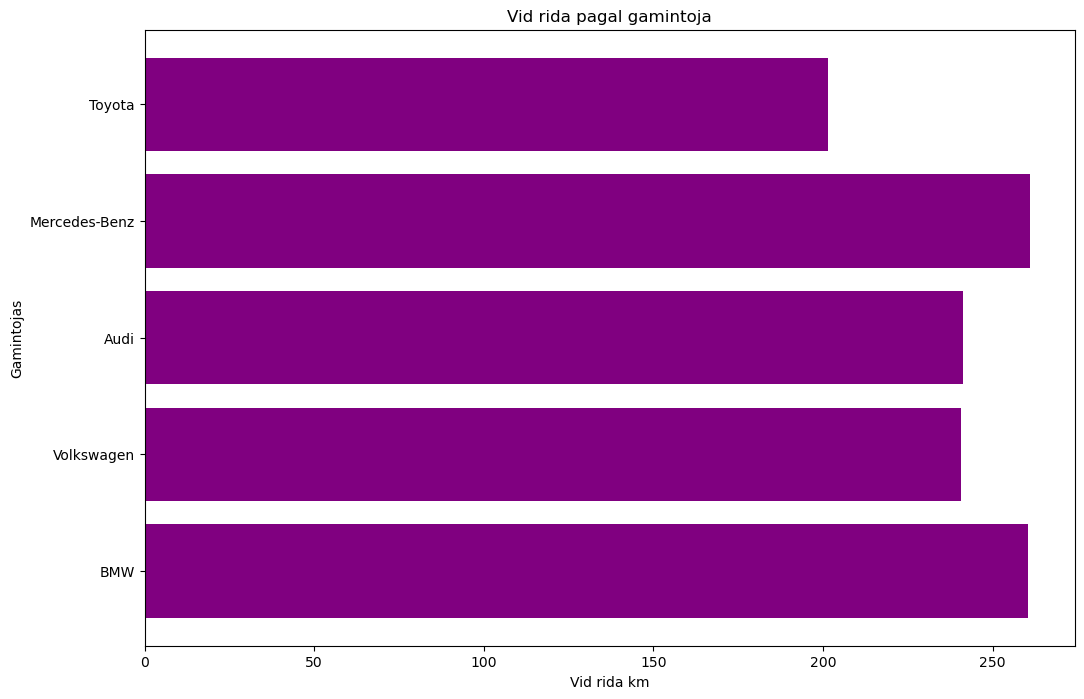

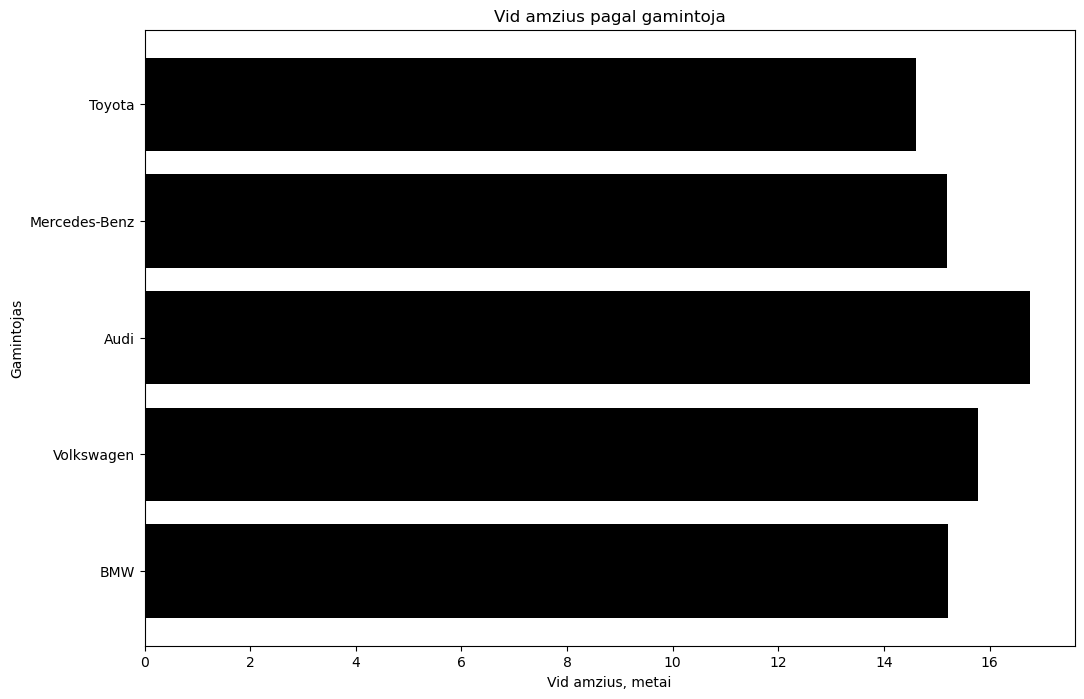

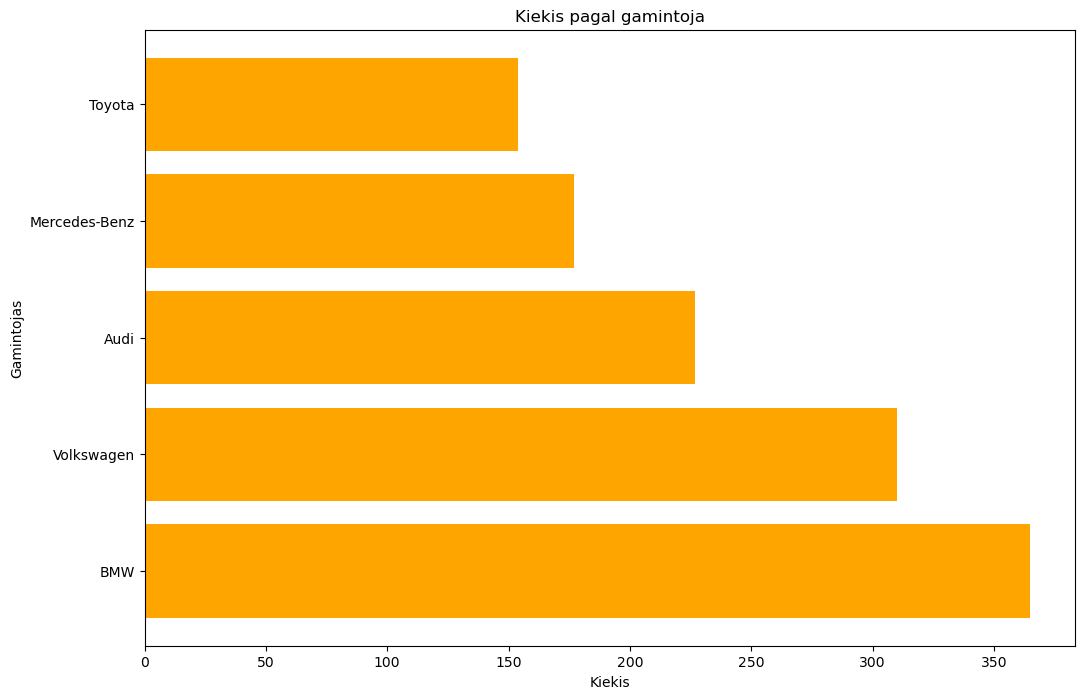

In [58]:
sql="""select gamintojas, count(*),  avg(price), avg(rida), round(avg(year(curdate()) - CASE 
when length(pagaminimo_data) = 4 then pagaminimo_data
when length(pagaminimo_data) = 7 then left(pagaminimo_data, 4)
else null
end), 2) as date
from autopliuslt
where gamintojas is not null or 'nenurodyta'
group by gamintojas
order by count(*) desc
limit 5;"""

C.execute(sql)
ans = C.fetchall()
gamintojas, kiekis, vidkaina, vidrida, date = list(map(list, zip(*ans)))

plt.figure(figsize=(12, 8))
plt.barh(gamintojas, vidkaina, color='yellow')
plt.xlabel('Vid kaina')
plt.ylabel('Gamintojas')
plt.title('Vidutine kaina pagal gamintoja')
plt.show()

plt.figure(figsize=(12, 8))
plt.barh(gamintojas, vidrida, color='purple')
plt.xlabel('Vid rida km')
plt.ylabel('Gamintojas')
plt.title('Vid rida pagal gamintoja')
plt.show()


plt.figure(figsize=(12, 8))
plt.barh(gamintojas, date, color='black')
plt.xlabel('Vid amzius, metai')
plt.ylabel('Gamintojas')
plt.title('Vid amzius pagal gamintoja')
plt.show()

plt.figure(figsize=(12, 8))
plt.barh(gamintojas, kiekis, color='orange')
plt.xlabel('Kiekis')
plt.ylabel('Gamintojas')
plt.title('Kiekis pagal gamintoja')
plt.show()


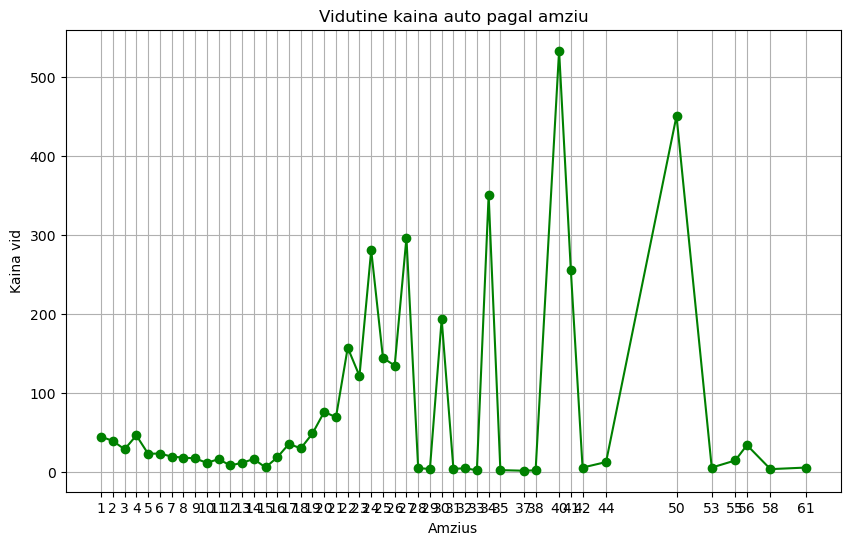

In [62]:
sql="""select 
    age as car_age,
    avg(price) as average_price
from (
select
year(curdate()) - case
when length(pagaminimo_data) = 4 then cast(pagaminimo_data as unsigned)
when length(pagaminimo_data) = 7 then cast(left(pagaminimo_data, 4) as unsigned)
end as age,
price
from autopliuslt
) as car_data
group by car_age
order by car_age;"""

C.execute(sql)
ans = C.fetchall()

car_ages, average_prices = zip(*ans)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(car_ages, average_prices, marker='o', linestyle='-', color='g')
plt.xlabel('Amzius')
plt.ylabel('Kaina vid')
plt.title('Vidutine kaina auto pagal amziu')
plt.grid(True)
plt.xticks(car_ages)
plt.show()

In [ ]:
# -- Sugrupuokite automobilius pagal jų amžių, ir suraskite
# -- vidutinę kainą kiekvienam amžiui.
# -- Ar didėjant automobilių amžiui, jų kaina yra linkusi mažėti?
# -- Pateikite vizualizaciją, atsakančią į pateiktą klausimą.
# -- Sugrupuokite automobilius pagal ridą, intervalais kas 5000 km, ir suraskite vidutinę kainą
# -- kiekviename intervale. Apvalinimas turi būti į
# -- didesnę pusę: 500 km turi tapti 5000 km.
# -- Ar didėjant ridai, automobilių kaina yra linkusi mažėti?
# -- Pateikite vizualizaciją, atsakančią į pateiktą klausimą.